In [1]:
!pip install transformers torch -q
!pip install nltk -q


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

print(torch)

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
# read csv file
path = "/work/youtoxic_english_1000.csv"
df = pd.read_csv(path)

In [4]:
# Aplicamoss metodo Thanos
df.drop(['CommentId', 'VideoId', "IsHomophobic", "IsRadicalism"], axis = 1, inplace = True)

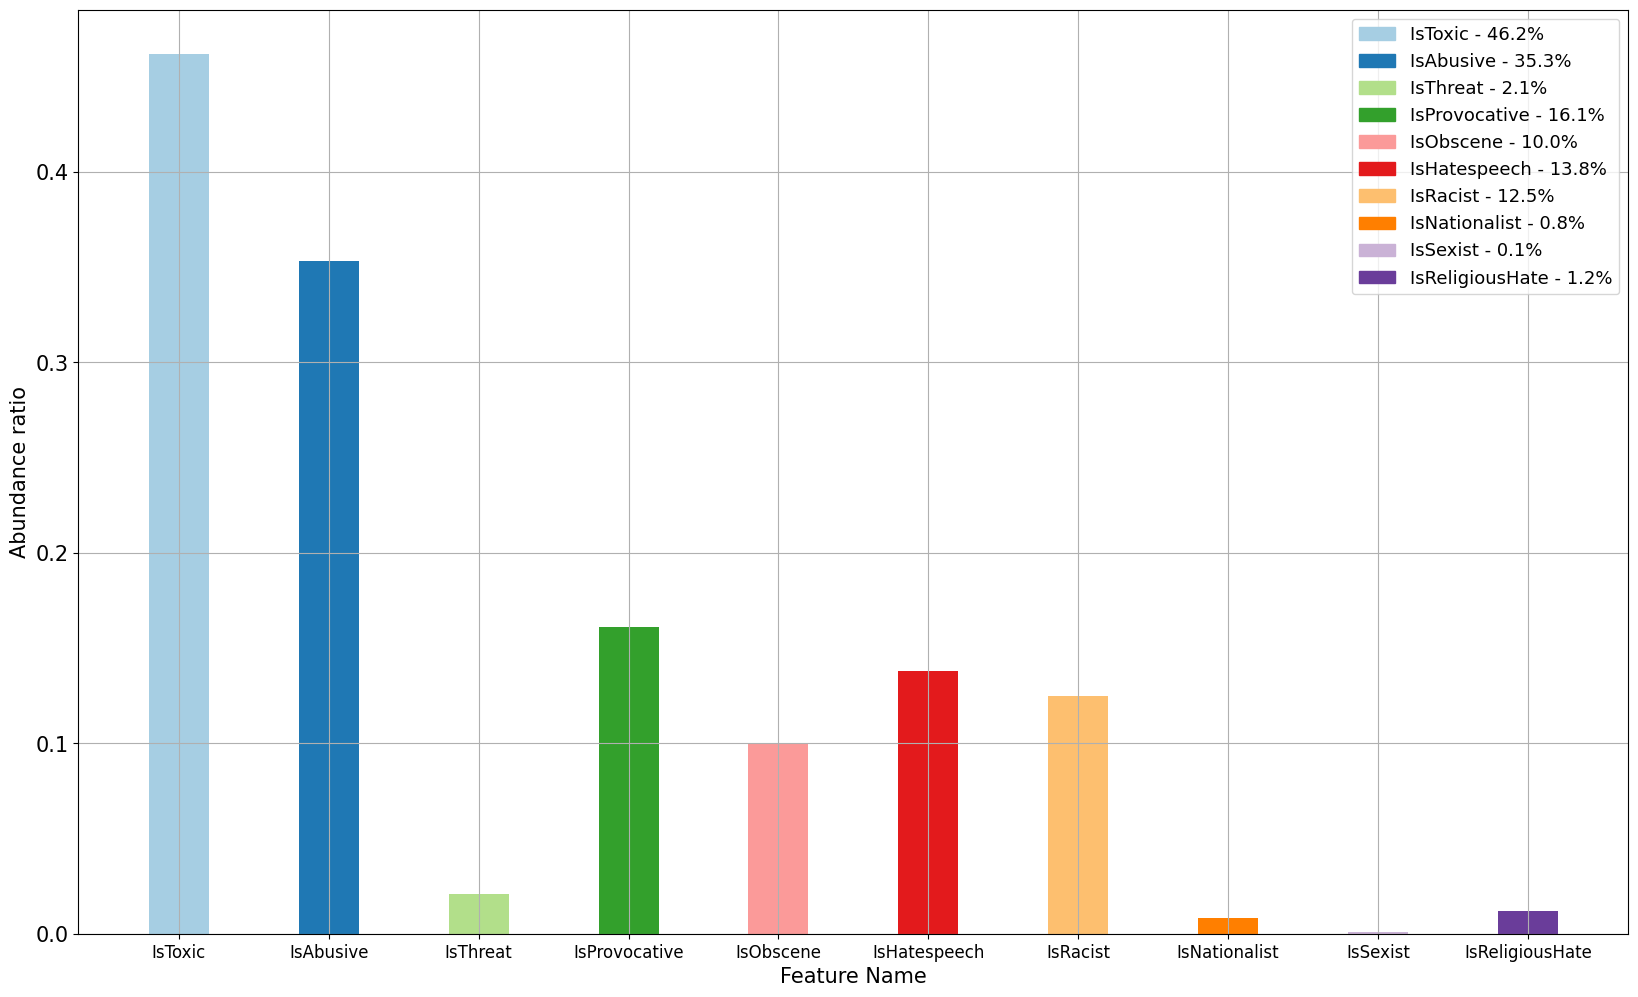

In [5]:
# traka
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

columns_names = df.columns.tolist()
bar_data = {}
for name in columns_names[1:]:
    bar_data[name] = len(df.loc[df[name] == 1]) / len(df[name])
    
    
bar_name = list(bar_data.keys())
values = list(bar_data.values())
fig = plt.figure(figsize = (20, 12))
colors = plt.cm.Paired(np.arange(12))

plt.bar(bar_name, values, color = colors,
        width = 0.4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("Feature Name", fontsize=15)
plt.ylabel("Abundance ratio", fontsize=15)
#plt.title("Percentage of each feature from all comments", fontsize=30)

patch = [mpatches.Patch(color=color, label=f"{bar_name} - {value*100}%") 
         for color,value, bar_name in zip(colors, values, bar_name)]
plt.legend(handles=patch, fontsize=13)
plt.grid()
plt.show()

In [19]:
corr_matrix = df.corr()
corr_matrix["IsToxic"].sort_values(ascending = False)

IsToxic            1.000000
IsAbusive          0.797086
IsProvocative      0.472718
IsHatespeech       0.431774
IsRacist           0.407869
IsObscene          0.359707
IsThreat           0.158048
IsReligiousHate    0.118928
IsNationalist      0.096908
IsSexist           0.034142
Name: IsToxic, dtype: float64

Exploración y preprocesamiento de datos
Preprocesamiento de texto (creo): 
    Tokenización: Divide los comentarios en palabras o tokens.
    Eliminación de caracteres especiales y signos de puntuación.
    Llevar el texto a minúsculas.
    Eliminación de palabras vacías (stop words) si es necesario.
    Otras tareas de limpieza o normalización según tus datos específicos.



In [7]:
# En esta funcion vamos a limpiar el texto, haciendo el proceso de tokenizacion, lematizacion y eliminacion de stopwords

# Primer importamos las librerias necesarias para procesar texto, 1. nlt 2. re

import nltk
import re

# Stopwords: son palabras que no aportan informacion al texto, como articulos, pronombres, etc
from nltk.corpus import stopwords

# Wordnetlemmatizer: es un algoritmo que nos permite obtener la raiz de una palabr
from nltk.stem import WordNetLemmatizer

# Word_tokenize: es un algoritmo que nos permite separar el texto en tokens
from nltk.tokenize import word_tokenize

# Descargar primero stopwords, wordnetlemmatizer y word_tokenize se descargan automaticamente

## descarga una lista de palabras stopword
nltk.download('stopwords')
print("esta la lista de chingaderas",  nltk.corpus.stopwords.words('english'))
## descarga modelos necesarios para la tokenizacion
nltk.download('punkt')
## descarga base de datos para la lematizacion en espik inglich
nltk.download('wordnet')
# nose que verga es este recurso
nltk.download('omw-1.4')



esta la lista de chingaderas ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', '

True

In [8]:
# aqui definimos las stopwords que vamos a utilizar, en que idioma y el lematizador
stop_words = set(stopwords.words('english'))

# Elegimos el lematizador, en este caso wordnetlemmatizer, que lo que hace es obtener la raiz de la palabra, se usa este porque es el que mejor funciona en ingles
lemmatizer = WordNetLemmatizer()

In [9]:
# FUNCION PARA LIMPIAR EL TEXTO

cuerpo = []
def clean_text(text: str) -> str:
    try:
        # quitamos los http
        text = re.sub(r'http\S+', '', text)
        # pasamos todo a minuscula
        text = text.lower()
        # quitamos los numeros
        text = re.sub(r'\d+', '', text)
        # quitamos los signos de puntuacion
        text = re.sub(r'[^\w\s]', '', text)
        # quitamos los espacios en blanco
        text = re.sub(r'\s+', ' ', text)
        # quitamos los espacios en blanco al inicio y al final
        text = text.strip()
        # tokenizamos el texto
        tokens = word_tokenize(text)
        # lematizamos el texto
        filtered_tokens = [lemmatizer.lemmatize(w) for w in tokens if not w in stop_words]
        # retornamos el texto limpio
        textos_pa = " ".join(filtered_tokens)
        cuerpo.append(textos_pa)
        return " ".join(filtered_tokens)
    except Exception as e:
        print(e)
        return ""


In [10]:
# Usamos el metodo apply de Pandas para afectar a toda la col, eficaz, eficiente, efervescente
df['Text'] = df['Text'].apply(clean_text)

In [11]:
df["Text"]

In [12]:
df["IsToxic"] = df["IsToxic"].astype(int)
df["IsAbusive"] = df["IsAbusive"].astype(int)
df["IsProvocative"] = df["IsProvocative"].astype(int)

df.head()

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsReligiousHate
0,people would take step back make case wasnt an...,0,0,False,0,False,False,False,False,False,False
1,law enforcement trained shoot apprehend traine...,1,1,False,0,False,False,False,False,False,False
2,dont reckon black life matter banner held whit...,1,1,False,0,True,False,False,False,False,False
3,large number people like police officer called...,0,0,False,0,False,False,False,False,False,False
4,arab dude absolutely right shot extra time sho...,0,0,False,0,False,False,False,False,False,False


In [13]:
df.head()

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsReligiousHate
0,people would take step back make case wasnt an...,0,0,False,0,False,False,False,False,False,False
1,law enforcement trained shoot apprehend traine...,1,1,False,0,False,False,False,False,False,False
2,dont reckon black life matter banner held whit...,1,1,False,0,True,False,False,False,False,False
3,large number people like police officer called...,0,0,False,0,False,False,False,False,False,False
4,arab dude absolutely right shot extra time sho...,0,0,False,0,False,False,False,False,False,False


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(max_features=2500)
cuerpo = cv.fit_transform(cuerpo).toarray()
print(cuerpo)
cuerpo = np.append(cuerpo, np.array([[x] for x in df["IsRacist"].values]), axis=1 )
cuerpo = np.append(cuerpo, np.array([[x] for x in  df["IsProvocative"].values]), axis=1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
X = cuerpo
y = df["IsToxic"]


X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.20, random_state=0)

In [16]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
pred_lr = clf_lr.predict(X_test)

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       103
           1       0.94      0.78      0.85        97

    accuracy                           0.87       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



In [18]:
def predict_toxicity(text: str, vectorizer, model) -> str:
    # obtenemos el texto limpio
    text = clean_text(text)
    # transformamos el texto utilizando el vectorizador proporcionado (sin ajustar nuevamente)
    text_vector = vectorizer.transform([text]).toarray()
    # predecimos si es tóxico o no
    pred = model.predict(text_vector)
    # retornamos el resultado
    if pred[0] == 1:
        return "Tóxico"
    else:
        return "No tóxico"


resultado = predict_toxicity("I hate you", cv, clf_lr)
print("Resultado de la predicción:", resultado)

'numpy.ndarray' object has no attribute 'append'


ValueError: X has 2500 features, but LogisticRegression is expecting 2502 features as input.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22be43cf-6e58-4d4e-8694-3183dc7644ab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>